# Chapter 9: Investment Projections
In this chapter you will learn how to calculate and visualize projections for investments using our Model Portfolios. We will show possible outcomes given certain investment time horizons and amounts.

In [4]:
#HEADING 2: Calculating investment projections
#SKILL 2: Learn how to calculate investment projections

# Future Value (Compound)
#expectedReturn = myPortfolio.expectedReturn
expectedReturn = 0.08
initialInvestment = 5000
years = 1

valuePrincipal = initialInvestment * (1 + expectedReturn)
print(valuePrincipal)

valuePrincipal = initialInvestment * pow(1 + expectedReturn/12, (years*12))
print(valuePrincipal)

5400.0
5414.997534037549


In [5]:
# Future Value Annuity (Compound)
monthlyInvestment = 100
valueMonthly = monthlyInvestment * (pow(1 + expectedReturn/12, (years*12))-1)/(expectedReturn/12)
print(valueMonthly)

1244.9926021126466


In [6]:
# Combined future value
totalValue = valuePrincipal+valueMonthly
print(totalValue)

6659.990136150195


In [7]:
def returnProjection(expectedReturn, initialInvestment, monthlyInvestment, years):
  valuePrincipal = initialInvestment * pow(1 + expectedReturn/12, (years*12))
  valueMonthly = monthlyInvestment * (pow(1 + expectedReturn/12, (years*12))-1)/(expectedReturn/12)
  return valuePrincipal+valueMonthly

In [8]:
expectedRisk = 0.10
expectedReturnMin = expectedReturn - expectedRisk
expectedReturnMax = expectedReturn + expectedRisk
print(expectedReturnMin)
print(returnProjection(expectedReturnMin, initialInvestment, monthlyInvestment, years))
print(expectedReturnMax)
print(returnProjection(expectedReturnMax, initialInvestment, monthlyInvestment, years))

-0.020000000000000004
6089.97247567486
0.18
7282.212000384563


In [ ]:
#HEADING 3: Visualizing investment projections
#SKILL 3: Learn how to visualize investment projections

In [9]:
def returnProjectionByYear(expectedReturn, expectedRisk, initialInvestment, monthlyInvestment, years):
  from datetime import date
  import pandas as pd
  df = pd.DataFrame({'date': [],
                   'lowValue': [],
                   'value': [],
                   'highValue': []})
  df.set_index('date')

  for year in range(years+1):
    newValue = returnProjection(expectedReturn, initialInvestment, monthlyInvestment, year)
    newValueLower = returnProjection(expectedReturn-expectedRisk, initialInvestment, monthlyInvestment, year)
    newValueUpper = returnProjection(expectedReturn+expectedRisk, initialInvestment, monthlyInvestment, year)
    newDate = date.today()
    newDate = newDate.replace(year=newDate.year + year)
    df = df.append(pd.Series({'date': newDate, 'lowValue': newValueLower, 'value': newValue, 'highValue': newValueUpper},name=''))
  
  df = df.set_index(pd.DatetimeIndex(df['date']))
  df = df.drop(columns="date")
  return df

In [10]:
data = returnProjectionByYear(expectedReturn, expectedRisk, initialInvestment, monthlyInvestment, years)
data


,lowValue,value,highValue
date,,,
2023-01-11,5000.000000,5000.000000,5000.000
2024-01-11,6089.972476,6659.990136,7282.212


In [11]:
years = 10
data = returnProjectionByYear(expectedReturn, expectedRisk, initialInvestment, monthlyInvestment, years)
data

,lowValue,value,highValue
date,,,
2023-01-11,5000.000000,5000.000000,5000.000000
2024-01-11,6089.972476,6659.990136,7282.212000
2025-01-11,7158.344224,8457.758635,10010.866139
2026-01-11,8205.543322,10404.741032,13273.294611
2027-01-11,9231.989361,12513.322009,17173.913375
2028-01-11,10238.093620,14796.914166,21837.564050
2029-01-11,11224.259225,17270.043346,27413.509541
2030-01-11,12190.881315,19948.441029,34080.211294
2031-01-11,13138.347196,22849.144398,42051.041054


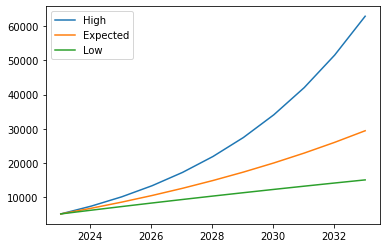

In [14]:
import matplotlib.pyplot as plt
plt.plot(data.index, data['highValue'], label="High")
plt.plot(data.index, data['value'], label="Expected")
plt.plot(data.index, data['lowValue'], label="Low")
plt.legend(loc="upper left")
plt.show()

In [15]:
years = 30
data = returnProjectionByYear(expectedReturn, expectedRisk, initialInvestment, monthlyInvestment, years)

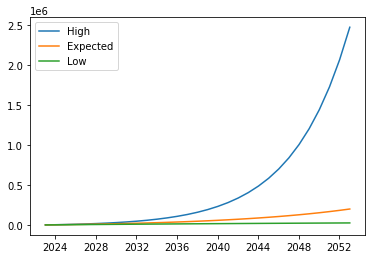

In [16]:
plt.plot(data.index, data['highValue'], label="High")
plt.plot(data.index, data['value'], label="Expected")
plt.plot(data.index, data['lowValue'], label="Low")
plt.legend(loc="upper left")
plt.show()

In [19]:
class Projection:
  def __init__(self, expectedReturn: float, expectedRisk: float, initialInvestment: float, monthlyInvestment: float, years: int):
    from datetime import date
    import pandas as pd
    df = pd.DataFrame({'date': [],
                    'lowValue': [],
                    'value': [],
                    'highValue': []})
    df.set_index('date')

    for year in range(years+1):
      newValue = self.returnProjection(expectedReturn, initialInvestment, monthlyInvestment, year)
      newValueLower = self.returnProjection(expectedReturn-expectedRisk, initialInvestment, monthlyInvestment, year)
      newValueUpper = self.returnProjection(expectedReturn+expectedRisk, initialInvestment, monthlyInvestment, year)
      newDate = date.today()
      newDate = newDate.replace(year=newDate.year + year)
      df = df.append(pd.Series({'date': newDate, 'lowValue': newValueLower, 'value': newValue, 'highValue': newValueUpper},name=''))
    
    df = df.set_index(pd.DatetimeIndex(df['date']))
    df = df.drop(columns="date")
    self.data = df

  @staticmethod
  def returnProjection(expectedReturn, initialInvestment, monthlyInvestment, years):
    valuePrincipal = initialInvestment * pow(1 + expectedReturn/12, (years*12))
    valueMonthly = monthlyInvestment * (pow(1 + expectedReturn/12, (years*12))-1)/(expectedReturn/12)
    return valuePrincipal+valueMonthly

  def visualize(self, targetAmount: float = 0.0):
    import matplotlib.pyplot as plt
    import matplotlib.ticker as ticker
    scale_y = 1e6
    ticks_y = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_y))
    fig, ax=plt.subplots()
    ax.yaxis.set_major_formatter(ticks_y)
    ax.set_ylabel('Millions (USD)')
    ax.plot(self.data.index, self.data['highValue'], label="High")
    ax.plot(self.data.index, self.data['value'], label="Expected")
    ax.plot(self.data.index, self.data['lowValue'], label="Low")
    plt.legend(loc="upper left")
    if (targetAmount > 0):
      plt.axhline(y=targetAmount)
    plt.show()

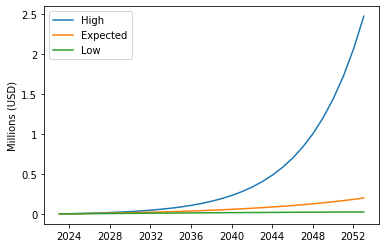

In [20]:
proj = Projection(expectedReturn, expectedRisk, initialInvestment, monthlyInvestment, years)
proj.visualize()

In [63]:
myGoal = Goal("Retirement", 
              targetYear=2041, 
              targetValue=3000000, 
              initialContribution=50000, 
              monthlyContribution=500, 
              priority="Wishes")

In [42]:
questionsFileName = '/content/drive/MyDrive/Books/Robo-advisor with Python/Data/Risk Questions.csv'
answersFileName = '/content/drive/MyDrive/Books/Robo-advisor with Python/Data/Risk Answers.csv'

toleranceQuestionnaire = RiskQuestionnaire()
toleranceQuestionnaire.loadQuestionnaire(questionsFileName, answersFileName, "Tolerance")

capacityQuestionnaire = RiskQuestionnaire()
capacityQuestionnaire.loadQuestionnaire(questionsFileName, answersFileName, "Capacity")

toleranceQuestionnaire.answerQuestionnaire()
capacityQuestionnaire.answerQuestionnaire()

In general, how would your best friend describe you as a risk taker?
0: A real gambler
1: Willing to take risks after completing adequate research
2: Cautious
3: A real risk avoider
Choose your answer between 0 and 3: 3


You are on a TV game show and can choose one of the following. Which would you take?
0: $1,000 in cash
1: A 50% chance at winning $5,000
2: A 25% chance at winning $10,000
3: A 5% chance at winning $100,000
Choose your answer between 0 and 3: 0


When you think of the word risk which of the following words comes to mind first?
0: Loss
1: Uncertainty
2: Opportunity
3: Thrill
Choose your answer between 0 and 3: 3


You are able to save money regularly.
0: Completely false
1: Somewhat true
2: Completely true
Choose your answer between 0 and 2: 2


You can pay all your monthly bills on time -- including any credit card or other debt.
0: Completely false
1: Somewhat true
2: Completely true
Choose your answer between 0 and 2: 1


If you lose money investing today, your curr

In [43]:
toleranceQuestionnaire.calculateScore()
capacityQuestionnaire.calculateScore()
riskTolScore = toleranceQuestionnaire.score
riskCapScore = capacityQuestionnaire.score

Risk Score:
A real risk avoider: 2
$1,000 in cash: 1
Thrill: 4
Total Risk Score: 7

Risk Score:
Completely true: 3
Somewhat true: 2
Completely true: 3
Completely true: 3
Total Risk Score: 11



In [44]:
myPortfolioID = Portfolio.getPortfolioMapping(riskTolScore, riskCapScore)

myPortfolio = Portfolio("VTI TLT IEI GLD DBC", expectedReturn = 0.06, portfolioName = "Moderate Growth", riskBucket = myPortfolioID)
myPortfolio.printPortfolio()

[*********************100%***********************]  5 of 5 completed
Portfolio Name: Moderate Growth
Risk Bucket: 3
Expected Return: 0.06
Expected Risk: 0.11955653211012475
Allocations: 
Ticker: TLT, Percentage: 0.12436
Ticker: IEI, Percentage: 0.00586
Ticker: GLD, Percentage: 0.4852
Ticker: DBC, Percentage: 0.0
Ticker: VTI, Percentage: 0.38459


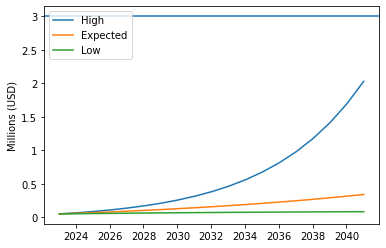

In [64]:
from datetime import date
yearsToGoal = myGoal.targetYear - date.today().year
myProjection = Projection(myPortfolio.expectedReturn, 
                          expectedRisk=myPortfolio.expectedRisk, 
                          initialInvestment=myGoal.initialContribution, 
                          monthlyInvestment=myGoal.monthlyContribution, 
                          years=yearsToGoal)
myProjection.visualize(myGoal.targetValue)

In [46]:
# Check if goal amount is achieved with expectedReturns by goalTimeline
import pandas as pd
def checkGoalPlausible(df: pd.DataFrame, goalValue) -> bool:
  maxValue = df['value'].max()
  if maxValue >= goalValue:
    return True
  else:
    return False

In [47]:
checkGoalPlausible(myProjection.data, myGoal.targetValue)

False

In [48]:
import scipy.stats as st
import math as math

minReturn = 0.022
avgReturn = 0.05
avgRisk = 0.07
timeHorizon = 10
std = avgRisk/math.sqrt(timeHorizon)
print(std)

z_score = (minReturn-avgReturn)/std
print(z_score)
print(1-st.norm.cdf(z_score))

# Use this it works! Need to add goal priority and use probs to determine if feasible. Can add risk or cash?

0.022135943621178655
-1.264911064067352
0.8970483946339659


In [52]:
# TODO: Use goal.priority, plus method to check if probability is in right range? If too high, take more risk? If too low, save more or extend timeline?
myGoal.getGoalProbabilities()

(0.65, 0.79)

In [65]:
# Many ways to calculate, this shows probability goal target amount will be exceeded over goal timeline, ideally above 50%
def goalProbability(minReturn, avgReturn, avgRisk, timeHorizon) -> float:
  import scipy.stats as st
  std = avgRisk/math.sqrt(timeHorizon)
  z_score = (minReturn-avgReturn)/std
  return 1-st.norm.cdf(z_score)

In [66]:
goalProbability(minReturn, avgReturn, avgRisk, timeHorizon)

0.5050301797583336

In [56]:
# Many ways to calculate, this shows probability goal target amount will be exceeded over goal timeline, ideally above 50%
import pandas as pd
def goalProbabilityForAmount(goalAmount, expectedReturn, portfolioRisk, years, initialInvestment, monthlyInvestment) -> float:
  import scipy.stats as st
  import math as math
  std = portfolioRisk/math.sqrt(years)
  
  amount = 0
  minReturn = 0.00
  while (amount < goalAmount):
    minReturn = minReturn + 0.0000001
    amount = Projection.returnProjection(minReturn, initialInvestment, monthlyInvestment, years)
  
  z_score = (minReturn-expectedReturn)/std
  #print(goalAmount)
  #print(amount)
  #print(minReturn)
  #print(portfolioRisk)
  #print(std)
  #print(z_score)
  return 1-st.norm.cdf(z_score)

In [68]:
goalProbabilityForAmount(myGoal.targetValue, 
                         myPortfolio.expectedReturn, 
                         myPortfolio.expectedRisk, 
                         yearsToGoal, 
                         myGoal.initialContribution, 
                         myGoal.monthlyContribution)

1.6038788164252082e-07

In [58]:
# Reverse calculate from FV formula required monthly investment to hit goal amount by goalTimeline?
def calculateMonthlyMinimum(expectedReturn, initialInvestment, years, goalAmount) -> float:
  monthlyInvestment = (goalAmount - (initialInvestment * pow(1 + expectedReturn/12, (years*12))))/((pow(1 + expectedReturn/12, (years*12))-1)/(expectedReturn/12)) 
  return monthlyInvestment

In [59]:
calculateMonthlyMinimum(myPortfolio.expectedReturn, 
                        myGoal.initialContribution, 
                        yearsToGoal, 
                        myGoal.targetValue)

7365.788491211729

In [72]:
myGoal.monthlyContribution = calculateMonthlyMinimum(myPortfolio.expectedReturn, 
                                                     myGoal.initialContribution, 
                                                     yearsToGoal, 
                                                     myGoal.targetValue)

goalProbabilityForAmount(myGoal.targetValue, 
                         myPortfolio.expectedReturn, 
                         myPortfolio.expectedRisk, 
                         yearsToGoal, 
                         myGoal.initialContribution, 
                         myGoal.monthlyContribution)

0.4999999999901551

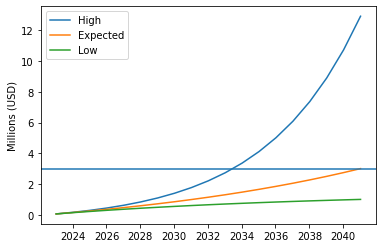

In [73]:
myProjection = Projection(myPortfolio.expectedReturn, 
                          myPortfolio.expectedRisk, 
                          myGoal.initialContribution, 
                          myGoal.monthlyContribution, 
                          yearsToGoal)
myProjection.visualize(myGoal.targetValue)

In [74]:
goalProbabilityForAmount(myGoal.targetValue, 
                         myPortfolio.expectedReturn, 
                         myPortfolio.expectedRisk, 
                         yearsToGoal+2, 
                         myGoal.initialContribution, 
                         myGoal.monthlyContribution)

0.705926578435728

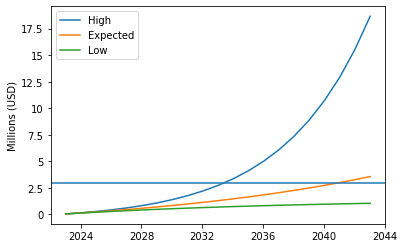

In [75]:
myProjection = Projection(myPortfolio.expectedReturn, 
                          myPortfolio.expectedRisk, 
                          myGoal.initialContribution, 
                          myGoal.monthlyContribution, 
                          yearsToGoal+2)
myProjection.visualize(myGoal.targetValue)

In [ ]:
goalProbabilityForAmount(myGoal.targetValue, 
                         myPortfolio.expectedReturn, 
                         myPortfolio.expectedRisk, 
                         30, 
                         500000, 
                         1500)

0.7449651994058964

In [ ]:
pip install pandas_montecarlo --upgrade --no-cache-dir

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for pandas-montecarlo: filename=pandas_montecarlo-0.0.2-py3-none-any.whl size=7565 sha256=42c495ead763a19f62aa8d8a1f821353729f55472fd7986bab539cdcf90849a3
  Stored in directory: /tmp/pip-ephem-wheel-cache-tgovkz6b/wheels/0e/45/c4/645c79733e2ba8dce5e8f52b3dbd8fe43bf8b400f1bf483707
Successfully built pandas-montecarlo


In [ ]:
import pandas_montecarlo
data = yf.download("VTI TLT IEI GLD DBC", group_by="Ticker", period="20y")
data = data.iloc[:, data.columns.get_level_values(1)=="Close"]
data = data.dropna()
data.columns = data.columns.droplevel(1)
data['Total'] = data.sum(axis=1)
data['Return'] = data['Total'].pct_change().fillna(0)
data

[*********************100%***********************]  5 of 5 completed


,IEI,VTI,DBC,GLD,TLT,Total,Return
Date,,,,,,,
2007-01-11,99.919998,70.500000,22.650000,60.630001,88.449997,342.149996,0.000000
2007-01-12,99.930000,70.964996,23.180000,62.169998,88.040001,344.284996,0.006240
2007-01-16,99.830002,70.830002,22.650000,61.970001,88.230003,343.510008,-0.002251
2007-01-17,99.820000,70.879997,22.850000,62.639999,87.959999,344.149996,0.001863
2007-01-18,99.910004,70.500000,22.610001,62.259998,88.230003,343.510006,-0.001860
...,...,...,...,...,...,...,...
2022-10-31,113.540001,194.029999,25.120001,151.910004,96.110001,580.710005,-0.006263
2022-11-01,113.209999,193.429993,25.500000,153.460007,96.769997,582.369995,0.002859
2022-11-02,113.110001,188.339996,25.730000,152.389999,96.349998,575.919994,-0.011075


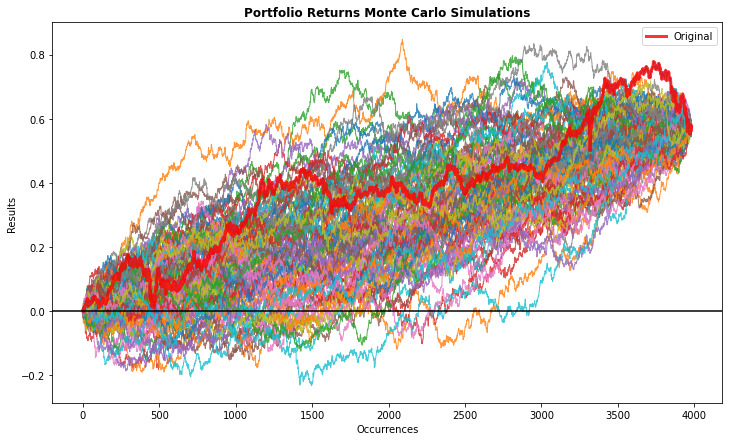

In [ ]:
mc = data['Return'].montecarlo(sims=100)
mc.plot(title="Portfolio Returns Monte Carlo Simulations", figsize=(12,7))